In [1]:
import os
import time as t
import re
import numpy as np
import math
from os import listdir
from os.path import isfile, join

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from scipy.ndimage import imread
from scipy import ndimage
from scipy.ndimage.filters import gaussian_filter

from PIL import Image

from utils import *

In [2]:
pixel_size = 3.2 # um
frame_rate = 0.886 # um
vel_factor = pixel_size / frame_rate

print('Velocity for 1 px:', vel_factor)

Velocity for 1 px: 3.6117381489841986


In [3]:
path_input = u'e:\\Data\\burst\\'
path_output = u'e:\\Data\\burst\\movie\\'

orig = read_tiff(path_input + 'vid_1_orig.tif', 100)
flow = read_tiff(path_input + 'vid_2_flow.tif', 100)
amp = read_tiff(path_input + 'vid_amp_raw.tif', 100)
mask= read_tiff(path_input + 'vid_amp_mask_cleamed.tif', 100)

frames_count = len(orig)
print(frames_count)

w = orig[0].shape[1]
h = orig[0].shape[0]

print(w, h)

60
468 342


In [4]:

#index_remove_raw = np.array([2,9,10,17,18,25,32,33,40,41,48,49,56,64,71,72,79,
#                             80,87,88,95,102,103,110,111,114,115]) - 1 
index_remove_raw = np.array([2,9,10,17,18,25,32,33,40,41,48,49,56]) - 1 
keep_indexs = np.arange(116)

keep_indexs = np.delete(keep_indexs , index_remove_raw)
print(keep_indexs)

[  0   2   3   4   5   6   7  10  11  12  13  14  15  18  19  20  21  22
  23  25  26  27  28  29  30  33  34  35  36  37  38  41  42  43  44  45
  46  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115]


In [5]:
import matplotlib.image as image

color_code = image.imread(path_input + '\\figures\\color.tif')
vel_code = image.imread(path_input + '\\figures\\vel_bar.tif')

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

  0%|                                                    | 0/1 [00:00<?, ?it/s]

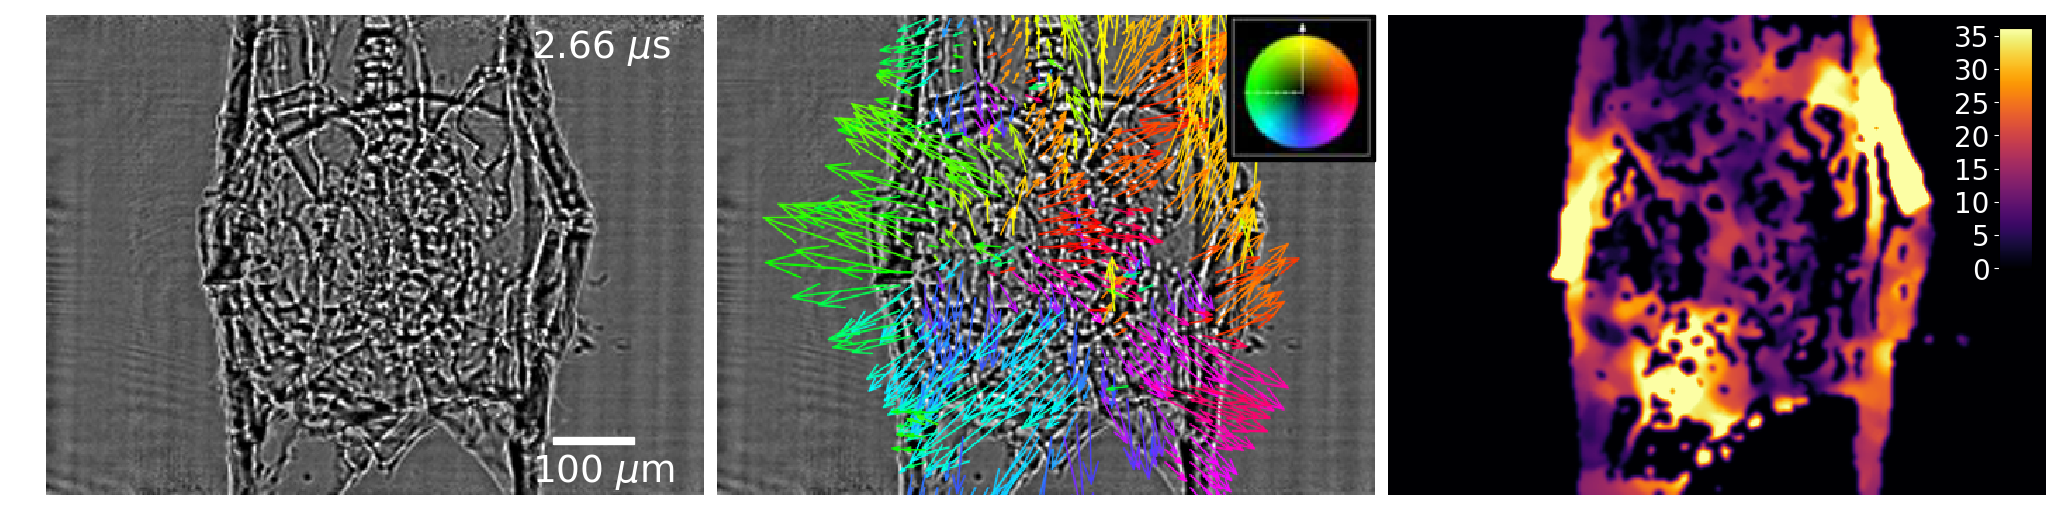

100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


In [8]:

fontsize = 27


i = 10

plt.style.use('default')

for i in tqdm(range(2,3)):
#for i in tqdm(range(len(orig))):


    fig = plt.figure()

    fig.set_size_inches(20, 8, forward=True)
    plt.subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

    gs = gridspec.GridSpec(1, 3)

    #-----------------------------
    # Plot 1: Original
    #-----------------------------
    
    ax0 = plt.subplot(gs[0, 0])
    #bbox_props = dict(boxstyle="square", fc="black", ec="black", alpha=0.5)
    #ax0.text(10, 30, r't = {} $ \mu$s'.format(keep_indexs[i]*frame_rate), fontsize=fontsize, color='white', weight='normal', bbox=bbox_props)
    ax0.text(380-5-30, 30, r'{:.2f} $ \mu$s'.format(keep_indexs[i]*frame_rate), fontsize=fontsize, color='white', weight='normal')
    plt.axis('off')
    plt.imshow(orig[i], cmap='gray')
    
    # Scale bar 
    width_for_100 = 32
    upscale = 468/260
    rect = patches.Rectangle((380-20,300),width_for_100*upscale,5,linewidth=1,edgecolor='w',facecolor='white')
    ax0.add_patch(rect)
    ax0.text(380-5-30, 300 + 32, r'100 $ \mu$m', fontsize=fontsize, color='white', weight='normal')
   

    #-----------------------------
    # Plot 2: Flow field
    #-----------------------------
    
    ax1 = plt.subplot(gs[0, 1])
    plt.axis('off')
    plt.imshow(flow[i])
    
    # Flow color code
    # draw only for the first frame 
    #if i == 0:
    imagebox = OffsetImage(color_code, zoom=1.5)
    ab = AnnotationBbox(imagebox, (420-5,52), pad=0)
    ax1.add_artist(ab)
     
    #-----------------------------
    # Plot 3: Magnitude
    #-----------------------------
    
    res = amp[i]*mask[i]
    res[3:190, w-60:w-3] = 0

    ax2 = plt.subplot(gs[0, 2])
    plt.axis('off')
    plt.imshow(res*vel_factor, vmax=10*vel_factor, cmap='inferno')
    
    # Color bar
    # draw only for the first frame 
    #if i == 0:
    cbaxes = inset_axes(ax2, width="5%", height="50%", loc=1, borderpad=1) 
    cbaxes.tick_params(color='white', labelcolor='white', labelsize = 20)
    cbaxes.patch.set_facecolor([1,1,0,0.5])
    plt.colorbar(cax=cbaxes, orientation='vertical')
    cbaxes.yaxis.set_ticks_position('left')
    

    fig.savefig(path_output + 'vid' + str(i).zfill(3) +'.tif')
    #plt.close()
    plt.show()